# Segmentation Preprocessing Notebook

## Introduction
This notebook contains the preprocessing explorations for the selected features in the previous notebook.  

The variables selected were selected for being possible candidates for use in clustering. This doesn't mean they will not be dropped.

The results of this notebook will be turned into the `preprocessing.py` file that will directly take as input the raw data in the AZDIAS and CUSTOMERS dataset

## Context/ Business Goal
The targeted company for this project is an **Organics** company that is selling **mail-ordered** products.

# Imports

In [2]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')

In [4]:
census = pd.read_parquet('data/trusted/census_subset.parquet')

In [5]:
census.head()

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,...,KBA13_ALTERHALTER_45,KBA13_SEG_VAN,KBA13_BJ_2004,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,910220,11.0,0.0,2.0,0.0,963.0,1992.0,0,0,0,...,2.0,4.0,3.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0
2,910225,10.0,0.0,1.0,0.0,712.0,1992.0,0,0,0,...,2.0,3.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0
3,910226,1.0,0.0,0.0,0.0,596.0,1997.0,0,0,0,...,3.0,4.0,3.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0
4,910241,3.0,0.0,4.0,0.0,435.0,1992.0,1,2,0,...,3.0,2.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0


In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 172 entries, LNR to ONLINE_AFFINITAET
dtypes: float64(130), int64(40), object(2)
memory usage: 1.1+ GB


# Utils

In [7]:
def list_cols_by_type(frame, dtype):

    return frame.dtypes[frame.dtypes == dtype].index

# NaN distribution
A cut was made on the prior notebook that reduced the overall number of columns but it is important to know the general level of NaN values so we know how to handle them

In [8]:
nan_rate = census.isna()\
                    .mean()\
                    .sort_values()

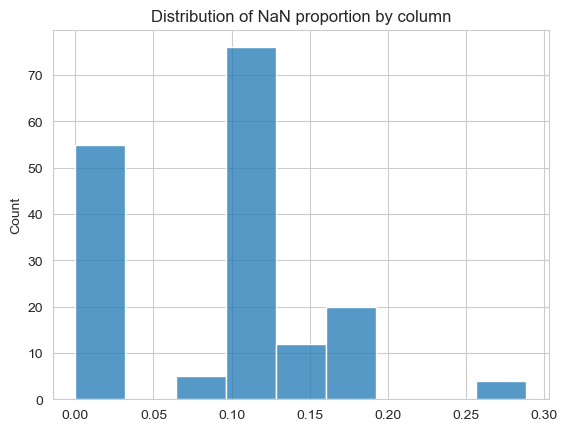

In [11]:
sns.histplot(data = nan_rate)

plt.title('Distribution of NaN proportion by column')

plt.show()

The majority of columns are missing up to 20% of data.

## Row-wise NaNs
Is there any co-occurance of NaNs?

In [12]:
census['_nan_count'] = census.isna().sum(axis = 1)

<AxesSubplot: title={'center': 'Distribution of NaN values by row'}, ylabel='Frequency'>

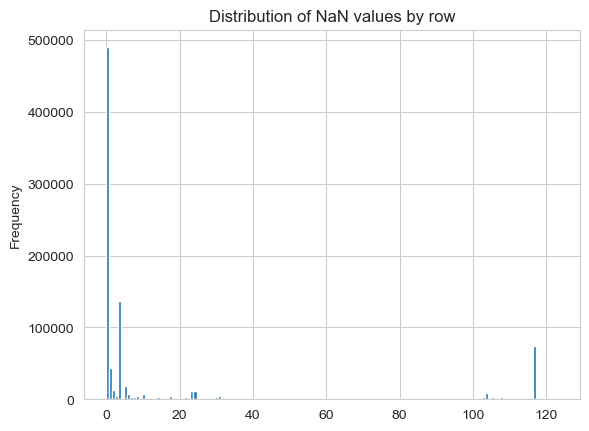

In [13]:
census['_nan_count'].plot(kind = 'hist', bins = 150, title = 'Distribution of NaN values by row')

In [14]:
(census['_nan_count'] == 0).sum()

489666

There are rows that have a lot of missing values.  
There are no rows without at least one missing value

In [ ]:
with pd.option_context('display.max_columns', None):
    display(census[census['_nan_count'] >= 20].sample(10, random_state=123))

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_REST,D19_BIO_OEKO,D19_DIGIT_SERV,D19_LEBENSMITTEL,D19_VOLLSORTIMENT,D19_VERSAND_REST,GEBAEUDETYP,KONSUMNAEHE,OST_WEST_KZ,WOHNLAGE,KBA05_MOTOR,KBA05_FRAU,KBA05_KRSZUL,KBA05_DIESEL,KBA05_KRSKLEIN,KBA05_KRSAQUOT,KBA05_MAXVORB,KBA05_MOTRAD,KBA05_MAXAH,KBA05_MODTEMP,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_MAXHERST,KBA05_MAXBJ,ARBEIT,ORTSGR_KLS9,HH_EINKOMMEN_SCORE,D19_KONSUMTYP,D19_GESAMT_DATUM,D19_BANKEN_DATUM,D19_VERSAND_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_BANKEN_ONLINE_QUOTE_12,D19_VERSAND_ONLINE_QUOTE_12,W_KEIT_KIND_HH,WOHNDAUER_2008,D19_GESAMT_ANZ_12,D19_VERSAND_ANZ_12,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,STRUKTURTYP,CAMEO_DEUG_2015,CAMEO_DEU_2015,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,LP_FAMILIE_GROB,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,VERS_TYP,ZABEOTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,KBA13_SEG_MINIWAGEN,KBA13_CCM_2000,KBA13_KMH_0_140,KBA13_SEG_SONSTIGE,KBA13_VORB_0,KBA13_CCM_1200,PLZ8_ANTG2,KBA13_KMH_211,KBA13_CCM_1000,PLZ8_ANTG3,KBA13_VORB_1_2,KBA13_ALTERHALTER_61,KBA13_ALTERHALTER_30,KBA13_AUTOQUOTE,KBA13_SEG_KLEINWAGEN,KBA13_CCM_1600,KBA13_GBZ,KBA13_SEG_WOHNMOBILE,KBA13_CCM_2500,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_OBEREMITTELKLASSE,KBA13_KRSAQUOT,PLZ8_GBZ,KBA13_VORB_2,KBA13_SEG_OBERKLASSE,KBA13_BJ_2008,KBA13_ALTERHALTER_60,PLZ8_ANTG1,KBA13_SEG_MITTELKLASSE,KBA13_SEG_GELAENDEWAGEN,KBA13_BJ_2000,KBA13_KRSSEG_KLEIN,KBA13_CCM_3000,KBA13_SEG_UTILITIES,KBA13_SEG_MINIVANS,KBA13_VORB_1,KBA13_BJ_1999,PLZ8_ANTG4,KBA13_KRSSEG_OBER,KBA13_CCM_3001,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_SEG_KOMPAKTKLASSE,KBA13_KMH_140_210,KBA13_SEG_SPORTWAGEN,KBA13_CCM_1400,KBA13_BAUMAX,PLZ8_BAUMAX,PLZ8_HHZ,KBA13_BJ_2009,KBA13_CCM_2501,KBA13_VORB_3,KBA13_CCM_1500,KBA13_BJ_2006,KBA13_HHZ,KBA13_CCM_1800,KBA13_SEG_KLEINST,KBA13_ALTERHALTER_45,KBA13_SEG_VAN,KBA13_BJ_2004,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,test_HH_TITEL,test_HH_titel,_nan_count
65686,793848,5.0,0.0,2.0,0.0,418.0,1994.0,0,0,0,0,0,0,0,7,0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,9.0,3.0,9.0,8,10,8,0.0,0.0,0.0,6.0,8.0,0,0,0.0,4.0,3.0,5.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,4.0,4,2,5,1,2,4,5,2.0,0,1.0,4.0,2.0,2.0,1.0,5.0,3.0,3,6,2,6,7,5,3,4,1,3,4,2,4,1,3.0,1.0,3,5.0,2.0,2.0,5.0,5.0,5.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,NaN,3.0,3.0,NaN,3.0,3.0,4.0,1.0,2.0,5.0,2.0,5.0,4.0,3.0,4.0,1.0,NaN,4.0,4.0,0.0,1.0,NaN,4.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,4.0,NaN,1.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,5.0,NaN,NaN,3.0,2.0,3.0,1.0,3.0,5.0,3.0,2.0,5.0,3.0,3.0,1.0,6.0,2.0,4.0,NaN,NaN,3.0,0.0,NaN,32
290343,412313,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,10,10,10,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,4.0,3,4,3,5,5,3,4,11.0,0,NaN,9.0,5.0,1.0,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,3,3.0,5.0,4.0,3.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,118
676462,748110,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,10

In [ ]:
with pd.option_context('display.max_columns', None):
    display(census[census['_nan_count'] < 20].sample(10, random_state=123))

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_REST,D19_BIO_OEKO,D19_DIGIT_SERV,D19_LEBENSMITTEL,D19_VOLLSORTIMENT,D19_VERSAND_REST,GEBAEUDETYP,KONSUMNAEHE,OST_WEST_KZ,WOHNLAGE,KBA05_MOTOR,KBA05_FRAU,KBA05_KRSZUL,KBA05_DIESEL,KBA05_KRSKLEIN,KBA05_KRSAQUOT,KBA05_MAXVORB,KBA05_MOTRAD,KBA05_MAXAH,KBA05_MODTEMP,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_MAXHERST,KBA05_MAXBJ,ARBEIT,ORTSGR_KLS9,HH_EINKOMMEN_SCORE,D19_KONSUMTYP,D19_GESAMT_DATUM,D19_BANKEN_DATUM,D19_VERSAND_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_BANKEN_ONLINE_QUOTE_12,D19_VERSAND_ONLINE_QUOTE_12,W_KEIT_KIND_HH,WOHNDAUER_2008,D19_GESAMT_ANZ_12,D19_VERSAND_ANZ_12,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,STRUKTURTYP,CAMEO_DEUG_2015,CAMEO_DEU_2015,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,LP_FAMILIE_GROB,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,VERS_TYP,ZABEOTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,KBA13_SEG_MINIWAGEN,KBA13_CCM_2000,KBA13_KMH_0_140,KBA13_SEG_SONSTIGE,KBA13_VORB_0,KBA13_CCM_1200,PLZ8_ANTG2,KBA13_KMH_211,KBA13_CCM_1000,PLZ8_ANTG3,KBA13_VORB_1_2,KBA13_ALTERHALTER_61,KBA13_ALTERHALTER_30,KBA13_AUTOQUOTE,KBA13_SEG_KLEINWAGEN,KBA13_CCM_1600,KBA13_GBZ,KBA13_SEG_WOHNMOBILE,KBA13_CCM_2500,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_OBEREMITTELKLASSE,KBA13_KRSAQUOT,PLZ8_GBZ,KBA13_VORB_2,KBA13_SEG_OBERKLASSE,KBA13_BJ_2008,KBA13_ALTERHALTER_60,PLZ8_ANTG1,KBA13_SEG_MITTELKLASSE,KBA13_SEG_GELAENDEWAGEN,KBA13_BJ_2000,KBA13_KRSSEG_KLEIN,KBA13_CCM_3000,KBA13_SEG_UTILITIES,KBA13_SEG_MINIVANS,KBA13_VORB_1,KBA13_BJ_1999,PLZ8_ANTG4,KBA13_KRSSEG_OBER,KBA13_CCM_3001,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_SEG_KOMPAKTKLASSE,KBA13_KMH_140_210,KBA13_SEG_SPORTWAGEN,KBA13_CCM_1400,KBA13_BAUMAX,PLZ8_BAUMAX,PLZ8_HHZ,KBA13_BJ_2009,KBA13_CCM_2501,KBA13_VORB_3,KBA13_CCM_1500,KBA13_BJ_2006,KBA13_HHZ,KBA13_CCM_1800,KBA13_SEG_KLEINST,KBA13_ALTERHALTER_45,KBA13_SEG_VAN,KBA13_BJ_2004,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,test_HH_TITEL,test_HH_titel,_nan_count
132455,484342,1.0,0.0,2.0,0.0,841.0,1992.0,6,0,0,0,0,0,0,0,6,1.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,1.0,5.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,4.0,3.0,5.0,2.0,2.0,4,9,4,10.0,0.0,10.0,1.0,9.0,2,2,2.0,1.0,2.0,2.0,9.0,2.0,4.0,2.0,3.0,3.0,4.0,0.0,0.0,0.0,3,2,1.0,3,4,2,3,5,1,3,2.0,1,3.0,8.0,4.0,5.0,1.0,15.0,2.0,2,1,3,2,2,6,6,1,4,5,7,5,3,3,2.0,2.0,4,1.0,4.0,4.0,3.0,1.0,1.0,2.0,4.0,3.0,0.0,3.0,2.0,4.0,1.0,5.0,0.0,0.0,4.0,3.0,2.0,3.0,2.0,2.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,2.0,3.0,4.0,3.0,5.0,3.0,2.0,3.0,4.0,3.0,4.0,3.0,0.0,3.0,5.0,2.0,2.0,1.0,2.0,5.0,3.0,1.0,1.0,4.0,3.0,5.0,0.0,2.0,4.0,4.0,1.0,3.0,3.0,3.0,4.0,4.0,3.0,6.0,4.0,1.0,5.0,5.0,0.0,NaN,1
243185,1025038,8.0,0.0,1.0,0.0,184.0,1992.0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,7.0,4.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,3.0,1.0,2.0,3.0,1.0,3.0,3.0,6.0,9.0,10,10,10,0.0,0.0,0.0,6.0,9.0,0,0,0.0,7.0,3.0,7.0,33.0,2.0,1.0,4.0,4.0,1.0,1.0,4.0,1.0,0.0,3,1,4.0,3,3,4,4,1,2,6,5.0,0,3.0,1.0,1.0,2.0,1.0,10.0,3.0,6,6,4,6,5,6,4,5,5,5,5,2,5,4,1.0,1.0,6,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,4.0,5.0,1.0,2.0,3.0,3.0,3.0,4.0,3.0,1.0,1.0,0.0,5.0,2.0,2.0,5.0,1.0,5.0,3.0,3.0,3.0,1.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,2.0,3.0,2.0,2.0,2.0,5.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,3.0,5.0,2.0,4.0,2.0,1.0,0.0,NaN,1
41062,762769,3.0,0.0,1.0,0.0,492.0,1992.0,0,0,0,0,0,0,0,0,0,3.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,1.0,5.0,3.0,2.0,3.0,4.0,1.0,4.0,6.0,

Looking into samples, it looks like NaNs occur somewhat simultaneously across different segments of columns.  
This indicates that data might be Missing at Random (MAR). The missing values can be related to persons that did not answer all questionnaires.  
For more insight into this, this [link](https://www.scribbr.com/statistics/missing-data/) is available.  

Either way, data points that have too many empty columns might affect clustering performance, since a big chunk of their distributions might be imputed

In [17]:
census['_nan_prop'] = census['_nan_count'] / census.shape[1]

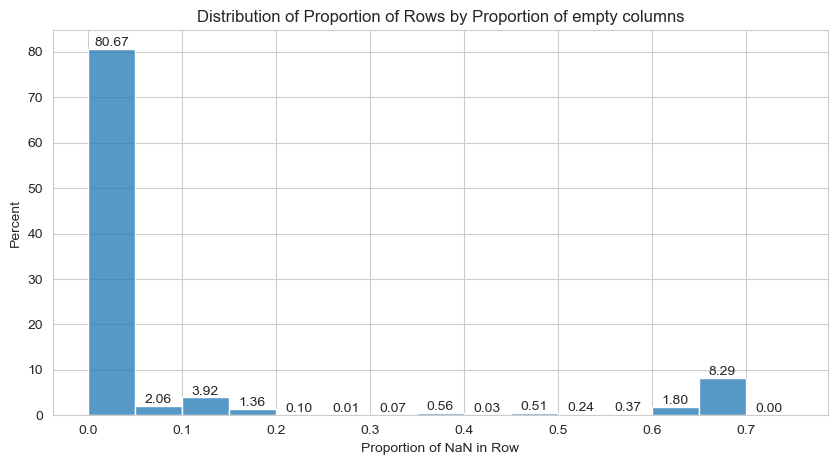

In [18]:
fig, ax = plt.subplots(figsize = (10,5))

g = sns.histplot(census, x = '_nan_prop', binwidth = 0.05, stat = 'percent', ax = ax)

g.bar_label(g.containers[-1], fmt = '%.2f')

plt.title('Distribution of Proportion of Rows by Proportion of empty columns')

g.set_xlabel('Proportion of NaN in Row')

plt.show()

From the graph above, most rows have up to 20% of their columns with NaNs. This is a relatively high number, but the spikes in the 60 - 70% is more worrying.

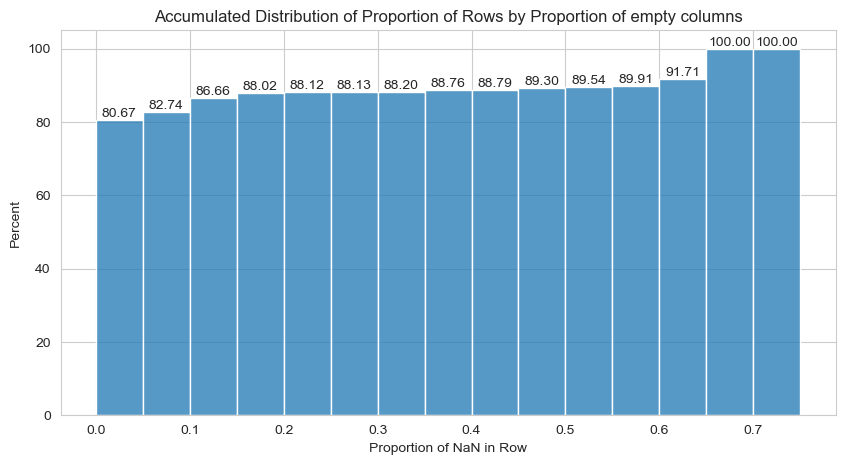

In [19]:
fig, ax = plt.subplots(figsize = (10,5))

g = sns.histplot(census, x = '_nan_prop', binwidth = 0.05, stat = 'percent',cumulative=True,ax = ax)

g.bar_label(g.containers[-1], fmt = '%.2f')

plt.title('Accumulated Distribution of Proportion of Rows by Proportion of empty columns')

g.set_xlabel('Proportion of NaN in Row')

plt.show()

The datapoints with a lot of nan values account to almost 10% of the data. This can heavily influence clustering.

In [20]:
row_total = census.shape[0]

for thresh in [0.2,0.3,0.5,0.6]:

    row_count = census[census['_nan_prop'] <= thresh].shape[0]

    print(f'Proportion of remaining rows for {thresh:.2%} threshold: {(row_count / row_total):.2%}')


Proportion of remaining rows for 20.00% threshold: 88.02%
Proportion of remaining rows for 30.00% threshold: 88.13%
Proportion of remaining rows for 50.00% threshold: 89.30%
Proportion of remaining rows for 60.00% threshold: 89.91%


Given that the rows missing a lot of columns have a bigger impact on the dataframe, a cut for 20% will be done to the data.  
20% is still a considerable amount of columns missing from the data, but heavier cuts like 5% to 10% will result in a bigger data loss.  
Either way the main purpose of the cut will be to avoid that rows get too many imputed values, especially those with > 50% empty columns.  
The threshold can be changed afterwards if judged necessary

# Fixing object cols

In [12]:
object_cols = list_cols_by_type(census, 'object')

In [13]:
census[object_cols]

,OST_WEST_KZ,CAMEO_DEU_2015
0,None,None
1,W,8A
2,W,4C
3,W,2A
4,W,6B
...,...,...
891216,W,7A
891217,W,9D
891218,W,4C
891219,W,9D


## Ost - West

In [14]:
census['OST_WEST_KZ'].unique()

array([None, 'W', 'O'], dtype=object)

In [15]:
census['OST_WEST_KZ'] = census['OST_WEST_KZ'].map({'O':0,'W':1})

## CAMEO_DEU_2015

In [16]:
unique_vals_cameo = list(census['CAMEO_DEU_2015'].dropna().unique())

print(unique_vals_cameo)

['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C', '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C', '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D', '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F', '1C']


In [17]:
# Sorting values
unique_vals_cameo = sorted(unique_vals_cameo)

In [18]:
unique_vals_cameo

['1A',
 '1B',
 '1C',
 '1D',
 '1E',
 '2A',
 '2B',
 '2C',
 '2D',
 '3A',
 '3B',
 '3C',
 '3D',
 '4A',
 '4B',
 '4C',
 '4D',
 '4E',
 '5A',
 '5B',
 '5C',
 '5D',
 '5E',
 '5F',
 '6A',
 '6B',
 '6C',
 '6D',
 '6E',
 '6F',
 '7A',
 '7B',
 '7C',
 '7D',
 '7E',
 '8A',
 '8B',
 '8C',
 '8D',
 '9A',
 '9B',
 '9C',
 '9D',
 '9E']

From the 'Values' Spreasheet, we can see that these variables have an ordinal component to them. Therefore, each category will be associated to unique integers, like the other columns

In [19]:
int_range = range(1, len(unique_vals_cameo) + 1)

cameo_map = dict(zip(unique_vals_cameo, int_range))

In [20]:
assert max(int_range) == len(unique_vals_cameo)

In [21]:
census['CAMEO_DEU_2015'].head()

0    None
1      8A
2      4C
3      2A
4      6B
Name: CAMEO_DEU_2015, dtype: object

In [22]:
census['CAMEO_DEU_2015'] = census['CAMEO_DEU_2015'].map(cameo_map)

In [23]:
census['CAMEO_DEU_2015'].isna().mean()

0.11147852216229195

# Checking INT cols
Checking especially if there are any NaNs/ problems that were not identified and if the amount of actual unique categories in each column is helpful to use them as scale

In [24]:
int_col_list = list_cols_by_type(census, 'int64')

In [25]:
for col in int_col_list:

    print(col)

    print('# of unique values:', census[col].nunique(), f'min: {census[col].min()}', f'max: {census[col].max()}', end = '\n\n')

LNR
# of unique values: 891221 min: 191653 max: 1082873

D19_BANKEN_DIREKT
# of unique values: 8 min: 0 max: 7

D19_BANKEN_GROSS
# of unique values: 7 min: 0 max: 6

D19_BANKEN_LOKAL
# of unique values: 8 min: 0 max: 7

D19_BANKEN_REST
# of unique values: 8 min: 0 max: 7

D19_BIO_OEKO
# of unique values: 8 min: 0 max: 7

D19_DIGIT_SERV
# of unique values: 8 min: 0 max: 7

D19_LEBENSMITTEL
# of unique values: 8 min: 0 max: 7

D19_VOLLSORTIMENT
# of unique values: 8 min: 0 max: 7

D19_VERSAND_REST
# of unique values: 8 min: 0 max: 7

D19_GESAMT_DATUM
# of unique values: 10 min: 1 max: 10

D19_BANKEN_DATUM
# of unique values: 10 min: 1 max: 10

D19_VERSAND_DATUM
# of unique values: 10 min: 1 max: 10

D19_GESAMT_ANZ_12
# of unique values: 7 min: 0 max: 6

D19_VERSAND_ANZ_12
# of unique values: 7 min: 0 max: 6

ALTERSKATEGORIE_GROB
# of unique values: 5 min: 1 max: 9

ANREDE_KZ
# of unique values: 2 min: 1 max: 2

FINANZ_MINIMALIST
# of unique values: 5 min: 1 max: 5

FINANZ_SPARER
# of uni

Integer columns look OK, no out of ordinary values are in the maxima or minima

# Float columns
Some columns are actually numeric, but not all of them. This happens especially because of float values

In [26]:
num_cols = ['ANZ_HAUSHALTE_AKTIV',
            'ANZ_HH_TITEL',
            'ANZ_PERSONEN',
            'ANZ_TITEL',
            'GEBURTSJAHR',
            'KBA13_ANZAHL_PKW',
            'MIN_GEBAEUDEJAHR']

num_cols = np.intersect1d(census.columns, num_cols)

In [27]:
float_col_list = list_cols_by_type(census, 'float64')

In [28]:
cat_cols_as_float = list(set(float_col_list) - set(num_cols)) 

In [29]:
# Are all values >= 0?
((census[float_col_list] < 0).any() == False).all()

True

## Numeric Cols

In [30]:
census[num_cols].describe()

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR
count,798073.000000,794213.000000,817722.000000,817722.000000,785421.000000,798073.000000
mean,8.287263,0.040647,1.727637,0.004162,619.701439,1993.277011
std,15.628087,0.324028,1.155849,0.068855,340.034318,3.332739
min,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000
25%,1.000000,0.000000,1.000000,0.000000,384.000000,1992.000000
50%,4.000000,0.000000,1.000000,0.000000,549.000000,1992.000000
75%,9.000000,0.000000,2.000000,0.000000,778.000000,1993.000000
max,595.000000,23.000000,45.000000,6.000000,2300.000000,2016.000000


Some problems:

- Birthyear 0
- Number of persons in HOUSEHOLD having max at 45

#### Person count

In [31]:
census['ANZ_PERSONEN'].nunique()

30

In [32]:
census['ANZ_PERSONEN'].unique()

array([nan,  2.,  1.,  0.,  4.,  3.,  5.,  7.,  6.,  8., 12.,  9., 21.,
       10., 13., 11., 14., 45., 20., 31., 29., 37., 16., 22., 15., 23.,
       18., 35., 17., 40., 38.])

In [33]:
census[census['ANZ_PERSONEN'] >= 10].shape[0]

162

Only a few entries are greater than 10. Will not be handled

### Binarizing ANZ_HH_TITEL

In [21]:
census['ANZ_HH_TITEL'].value_counts(dropna = False, normalize=True)

0.0     0.864257
NaN     0.108848
1.0     0.022617
2.0     0.002759
3.0     0.000656
4.0     0.000260
5.0     0.000131
6.0     0.000119
8.0     0.000076
7.0     0.000073
9.0     0.000038
13.0    0.000033
12.0    0.000025
11.0    0.000025
14.0    0.000018
10.0    0.000018
17.0    0.000015
20.0    0.000010
15.0    0.000008
18.0    0.000007
16.0    0.000003
23.0    0.000003
Name: ANZ_HH_TITEL, dtype: float64

In [56]:
census['ANZ_HH_TITEL'] = np.where((census['ANZ_HH_TITEL'] == 0) &\
                                   (census['ANZ_HH_TITEL'].notnull()), 0,
                                   np.where(census['ANZ_HH_TITEL'].notnull(), 1,np.nan))

## Other Cols

In [36]:
# Looking for binary cols
for col in cat_cols_as_float:

    column = census[col].dropna()

    unique_values = column.unique()

    if len(unique_values) == 2:

        print(col, 'Binary')

VERS_TYP Binary
SOHO_KZ Binary
OST_WEST_KZ Binary


These are in fact binary

In [37]:
(census[cat_cols_as_float] < 0).any().sum()

0

No columns present negative values

# Segregating columns by type

Segregation was done manually on the 'Values' file

In [38]:
att_info = pd.read_excel('data/raw/DIAS Attributes - Values 2017.xlsx', usecols = 'B:E', header = 1)

In [39]:
var_types = att_info[['Attribute','Type']].dropna()

In [40]:
len(census.columns)

195

In [41]:
var_types[var_types['Attribute'].isin(census.columns.drop('LNR'))]

,Attribute,Type
5,ALTERSKATEGORIE_GROB,interval
33,ANREDE_KZ,binary
36,ANZ_HAUSHALTE_AKTIV,numeric
37,ANZ_HH_TITEL,numeric
38,ANZ_PERSONEN,numeric
...,...,...
2216,VERS_TYP,binary
2219,WOHNDAUER_2008,interval
2229,WOHNLAGE,interval
2244,W_KEIT_KIND_HH,interval


In [42]:
not_found = np.setdiff1d(census.columns, var_types['Attribute'])

print(not_found)

['ALTERSKATEGORIE_FEIN' 'ANZ_KINDER' 'ANZ_STATISTISCHE_HAUSHALTE' 'ARBEIT'
 'CJT_KATALOGNUTZER' 'CJT_TYP_1' 'CJT_TYP_2' 'CJT_TYP_3' 'CJT_TYP_4'
 'CJT_TYP_5' 'CJT_TYP_6' 'D19_BANKEN_DIREKT' 'D19_BANKEN_GROSS'
 'D19_BANKEN_LOKAL' 'D19_BANKEN_REST' 'D19_BIO_OEKO' 'D19_DIGIT_SERV'
 'D19_LEBENSMITTEL' 'D19_VERSAND_REST' 'D19_VOLLSORTIMENT' 'KBA13_BAUMAX'
 'KBA13_CCM_1401_2500' 'KBA13_GBZ' 'KBA13_HHZ' 'KBA13_KMH_210' 'LNR'
 'SOHO_KZ' 'STRUKTURTYP']


In [43]:
# Manually assigning types to variables not found because of name matching problems
new_rows = [('ALTERSKATEGORIE_FEIN','interval'),
            ('ANZ_KINDER','numeric'),
            ('ANZ_STATISTISCHE_HAUSHALTE','numeric'),
            ('ARBEIT',),
            ('CJT_KATALOGNUTZER','interval'),
            ('CJT_TYP_1','binary'),
            ('CJT_TYP_2','binary'),
            ('CJT_TYP_3','binary'),
            ('CJT_TYP_4','binary'),
            ('CJT_TYP_5','binary'),
            ('CJT_TYP_6','binary'),
            ('D19_BANKEN_DIREKT','interval'),
            ('D19_BANKEN_GROSS','interval'),
            ('D19_BANKEN_LOKAL','interval'),
            ('D19_BANKEN_REST','interval'),
            ('D19_BIO_OEKO','interval'),
            ('D19_DIGIT_SERV','interval'),
            ('D19_LEBENSMITTEL','interval'),
            ('D19_VERSAND_REST','interval'),
            ('D19_VOLLSORTIMENT','interval'),
            ('KBA13_BAUMAX','interval'),
            ('KBA13_CCM_1401_2500','interval'),
            ('KBA13_GBZ','interval'),
            ('KBA13_HHZ','interval'),
            ('KBA13_KMH_210','interval'),
            ('SOHO_KZ','binary'),
            ('STRUKTURTYP','nominal')]

In [44]:
new_rows_frame = pd.DataFrame(new_rows, columns = ['Attribute', 'Type'])

In [45]:
var_types = pd.concat([var_types, new_rows_frame], axis = 0)

In [46]:
census.shape

(891221, 195)

In [47]:
census_var_types = var_types[var_types['Attribute'].isin(census.columns.drop('LNR'))]

In [48]:
census_var_types['Type'].value_counts()

interval    160
nominal      14
binary       11
numeric       8
Name: Type, dtype: int64

In [49]:
# Exporting for use in .py later-on
census_var_types.to_csv('data/trusted/census_var_types.csv')

If we were only handling numeric and interval variables, it would be possible to use PCA. Since this is not possible, another method will be used: Factor Analysis of Mixed Data (FAMD).  

Before we move on to modelling, we need to first adopt inputing strategies for the remaining cols

# Imputing strategy

Given the variable characteristics and the distribution of NaN proportion above, the following inputing strategy will be followed:

Categorical variables include: Interval, Nominal and Binary  
For categorical variables, inpute the mode


Numerical will be replaced with mean, for simplicity

## Categorical Imputing

In [50]:
cat_cols = census_var_types[census_var_types['Type'].isin(['interval', 'nominal', 'binary'])]['Attribute'].values

cat_cols = list(np.intersect1d(cat_cols, census.columns))

In [51]:
for col in cat_cols:

    nan_rate = census[col].isna().mean()

    if nan_rate <= 0.1:

        census[col].fillna(census[col].mode()[0], inplace = True)
    
    else:

        continue

## Numerical Imputing

In [52]:
num_cols = census_var_types[~census_var_types['Type'].isin(['interval', 'nominal', 'binary'])]['Attribute'].values

In [53]:
for col in num_cols:

    census[col].fillna(census[col].mean(), inplace = True)

# Aggregating D19 columns

125 x 125 Grid and Household informations

## Grid columns

In [57]:
grid_cols_list = ['D19_BANKEN_DIREKT',
                    'D19_BANKEN_GROSS',
                    'D19_BANKEN_LOKAL',
                    'D19_BANKEN_REST',
                    'D19_BIO_OEKO',
                    'D19_DIGIT_SERV',
                    'D19_LEBENSMITTEL',
                    'D19_VOLLSORTIMENT',
                    'D19_VERSAND_REST']

### Testing rule

Aggregation Logic:

0 = No transaction  
1,2,3 = Buyer within 12 months  
4,5,6 = Buyer within 12 - 24 months  
7 = Prospects

In [59]:
grid_conditions = [census['D19_BANKEN_DIREKT'] == 0,
                    census['D19_BANKEN_DIREKT'].isin([1,2,3]),
                    census['D19_BANKEN_DIREKT'].isin([4,5,6]),
                    census['D19_BANKEN_DIREKT'] == 7]

grid_choices = [0,1,2,3]

test = pd.Series(np.select(grid_conditions, grid_choices, default = np.nan))

In [64]:
census['D19_BANKEN_DIREKT'].value_counts(normalize=True).sort_index()

0    0.817767
1    0.008053
2    0.009110
3    0.030688
4    0.009842
5    0.020802
6    0.095148
7    0.008590
Name: D19_BANKEN_DIREKT, dtype: float64

In [65]:
test.value_counts(normalize = True).sort_index()

0.0    0.817767
1.0    0.047851
2.0    0.125791
3.0    0.008590
dtype: float64

In [66]:
for col in grid_cols_list:

    grid_conditions = [census[col] == 0,
                    census[col].isin([1,2,3]),
                    census[col].isin([4,5,6]),
                    census[col] == 7]

    grid_choices = [0,1,2,3]

    census[col] = np.select(grid_conditions, grid_choices, default = np.nan)

In [68]:
for col in grid_cols_list:

    display(census[col].value_counts().sort_index())

0.0    728811
1.0     42646
2.0    112108
3.0      7656
Name: D19_BANKEN_DIREKT, dtype: int64

0.0    785351
1.0     26691
2.0     79179
Name: D19_BANKEN_GROSS, dtype: int64

0.0    874745
1.0      3630
2.0      4324
3.0      8522
Name: D19_BANKEN_LOKAL, dtype: int64

0.0    821760
1.0      9787
2.0     52335
3.0      7339
Name: D19_BANKEN_REST, dtype: int64

0.0    854074
1.0      1970
2.0     19936
3.0     15241
Name: D19_BIO_OEKO, dtype: int64

0.0    857661
1.0      7898
2.0     21632
3.0      4030
Name: D19_DIGIT_SERV, dtype: int64

0.0    837914
1.0     11756
2.0     33233
3.0      8318
Name: D19_LEBENSMITTEL, dtype: int64

0.0    600002
1.0     56693
2.0    211295
3.0     23231
Name: D19_VOLLSORTIMENT, dtype: int64

0.0    734442
1.0     51633
2.0     99376
3.0      5770
Name: D19_VERSAND_REST, dtype: int64

## Household columns

In [73]:
household_cols_list = ['HH_EINKOMMEN_SCORE',
                        'D19_KONSUMTYP',
                        'D19_GESAMT_DATUM',
                        'D19_BANKEN_DATUM',
                        'D19_VERSAND_DATUM',
                        'D19_GESAMT_ONLINE_QUOTE_12',
                        'D19_BANKEN_ONLINE_QUOTE_12',
                        'D19_VERSAND_ONLINE_QUOTE_12',
                        'W_KEIT_KIND_HH',
                        'WOHNDAUER_2008',
                        'D19_GESAMT_ANZ_12',
                        'D19_VERSAND_ANZ_12',
                        'ANZ_KINDER',
                        'ANZ_STATISTISCHE_HAUSHALTE',
                        'STRUKTURTYP']

household_cols_list = list(np.intersect1d(census.columns, household_cols_list))

d19_household_cols = [col for col in household_cols_list if col.startswith('D19')]

In [77]:
sorted(d19_household_cols)

['D19_BANKEN_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_KONSUMTYP',
 'D19_VERSAND_ANZ_12',
 'D19_VERSAND_DATUM',
 'D19_VERSAND_ONLINE_QUOTE_12']

In [79]:
for col in d19_household_cols:

    display(census[col].value_counts())

10    678331
9      82707
8      33062
5      29494
7      20482
6      17152
1       8495
4       8406
2       8001
3       5091
Name: D19_BANKEN_DATUM, dtype: int64

0.0     588874
10.0     44065
5.0        391
3.0        220
7.0        214
8.0        172
9.0         67
6.0         50
2.0         35
4.0         18
1.0          2
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: int64

0    584797
1     99465
2     97282
3     45685
4     43579
5     16966
6      3447
Name: D19_GESAMT_ANZ_12, dtype: int64

10    354170
9      98281
5      93740
1      76009
2      59774
8      52852
4      44031
6      42008
7      37486
3      32870
Name: D19_GESAMT_DATUM, dtype: int64

0.0     393075
10.0    199906
5.0      10517
8.0       9467
7.0       6923
9.0       6046
3.0       3543
6.0       1679
2.0       1066
4.0       1017
1.0        869
Name: D19_GESAMT_ONLINE_QUOTE_12, dtype: int64

9.0    254296
1.0    117912
4.0     78262
6.0     56562
3.0     53330
2.0     49324
5.0     24422
Name: D19_KONSUMTYP, dtype: int64

0    637972
1     96577
2     81616
3     34258
4     29393
5      9712
6      1693
Name: D19_VERSAND_ANZ_12, dtype: int64

10    437886
9     100846
5      78589
1      53921
8      50332
2      40994
6      37125
4      34157
7      32104
3      25267
Name: D19_VERSAND_DATUM, dtype: int64

0.0     417367
10.0    187652
5.0       8034
8.0       6419
7.0       4920
9.0       3931
3.0       2653
6.0       1080
2.0        751
4.0        739
1.0        562
Name: D19_VERSAND_ONLINE_QUOTE_12, dtype: int64

In [80]:
for col in d19_household_cols:

    if 'DATUM' in col:
        
        census[col] = np.where(census[col] <= 5, 1,
                               np.where(census[col] < 10, 2, 3))
        
    if 'ANZ' in col:
        
        anz_conditions = [census[col] == 0, census[col] <= 2, census[col] <= 4, census[col] <= 5]

        anz_choices = [0,1,2,3]

        census[col] = np.select(condlist = anz_conditions, choicelist = anz_choices, default = np.nan)

    if 'QUOTE' in col:
        
        quote_conditions = [census[col] == 0, census[col] == 10]

        quote_choices = [0,2]

        census[col] = np.select(condlist = quote_conditions, choicelist=quote_choices, default = 1)

Logic:  
- Datum: Activity in the last 12 months, Activity older than 12 months, no activity
- ANZ: No activity, low, medium, high activity
- QUOTE: No online activity, partially online, Completely online

In [82]:
for col in d19_household_cols:

    display(census[col].value_counts().sort_index())

1     59487
2    153403
3    678331
Name: D19_BANKEN_DATUM, dtype: int64

0    588874
1    258282
2     44065
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: int64

0.0    584797
1.0    196747
2.0     89264
3.0     16966
Name: D19_GESAMT_ANZ_12, dtype: int64

1    306424
2    230627
3    354170
Name: D19_GESAMT_DATUM, dtype: int64

0    393075
1    298240
2    199906
Name: D19_GESAMT_ONLINE_QUOTE_12, dtype: int64

1.0    117912
2.0     49324
3.0     53330
4.0     78262
5.0     24422
6.0     56562
9.0    254296
Name: D19_KONSUMTYP, dtype: int64

0.0    637972
1.0    178193
2.0     63651
3.0      9712
Name: D19_VERSAND_ANZ_12, dtype: int64

1    232928
2    220407
3    437886
Name: D19_VERSAND_DATUM, dtype: int64

0    417367
1    286202
2    187652
Name: D19_VERSAND_ONLINE_QUOTE_12, dtype: int64